In [1]:
 
 
from google.colab import files
uploaded = files.upload()

Saving Telecom-Customer-Churn.csv to Telecom-Customer-Churn.csv


In [2]:
import pandas as pd
import numpy as np

import io

df_TelecomData = pd.read_csv(io.BytesIO(uploaded['Telecom-Customer-Churn.csv']))


In [3]:
df_TelecomData.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df_TelecomData.shape

(7043, 21)

In [5]:
df_TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pd.to_numeric(df_TelecomData.TotalCharges,errors='coerce').isnull()
df_TelecomData[pd.to_numeric(df_TelecomData.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:

df_TelecomData[df_TelecomData.TotalCharges!=' '].shape

(7032, 21)

In [8]:
#Remove rows with space in TotalCharges
df_TelecomData = df_TelecomData[df_TelecomData.TotalCharges!=' ']
df_TelecomData.shape

(7032, 21)

In [9]:
df_TelecomData.TotalCharges = pd.to_numeric(df_TelecomData.TotalCharges)

In [10]:
df_TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [11]:
df_TelecomData.describe(include='object').T

,count,unique,top,freq
customerID,7032,7032,9342-VNIMQ,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [12]:
df_TelecomData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_TelecomData.shape

(7032, 21)

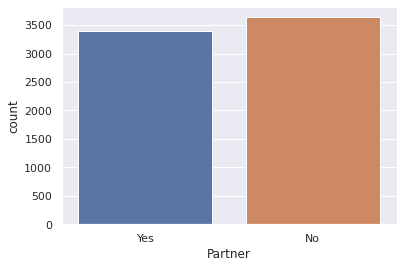

In [13]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Partner',data = df_TelecomData)

Text(0, 0.5, 'Number of Customer')

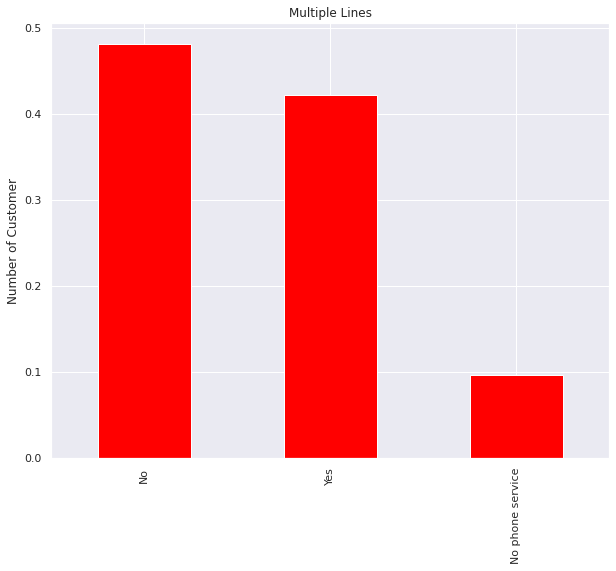

In [18]:
import matplotlib.pyplot as plt
df_TelecomData['MultipleLines'].value_counts(normalize = True).plot(figsize = (10, 8), kind = 'bar', color = 'red')
plt.title("Multiple Lines") 
plt.ylabel('Number of Customer')

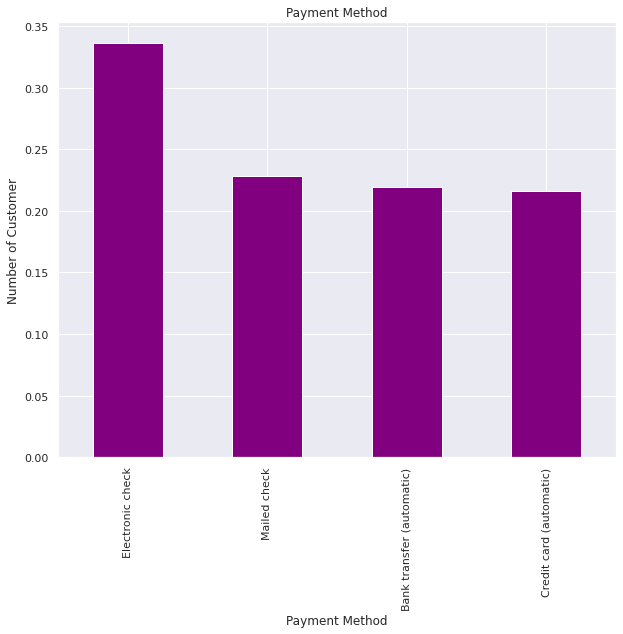

In [44]:
df_TelecomData['PaymentMethod'].value_counts(normalize = True).plot(figsize = (10, 8), kind = 'bar', color = 'purple')
plt.title("Payment Method")
plt.ylabel('Number of Customer')
plt.xlabel('Payment Method');

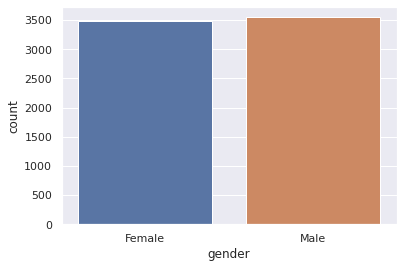

In [ ]:
ax = sns.countplot(x='gender',data = df_TelecomData)

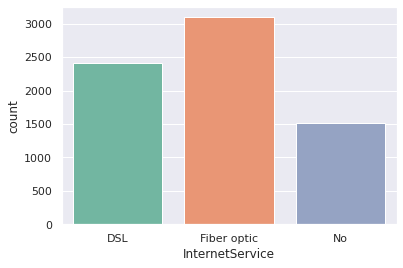

In [ ]:
ax = sns.countplot(x='InternetService',data = df_TelecomData,palette="Set2")

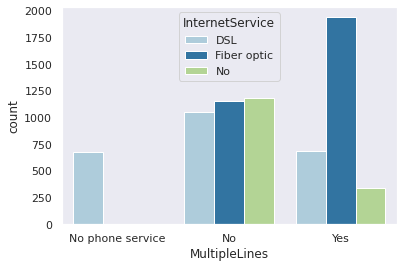

In [ ]:
sns.set_theme(style="dark")
ax = sns.countplot(x='MultipleLines',hue='InternetService',data=df_TelecomData,palette="Paired")

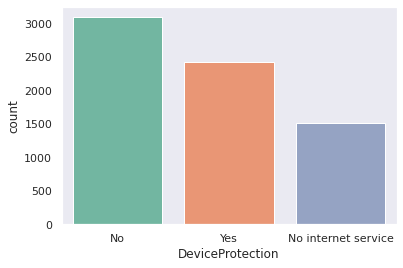

In [ ]:
ax = ax = sns.countplot(x='DeviceProtection',data = df_TelecomData,palette="Set2")

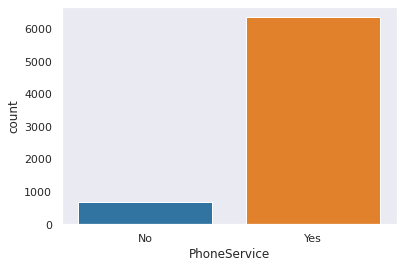

In [ ]:
ax = ax = sns.countplot(x='PhoneService',data = df_TelecomData,palette="tab10")


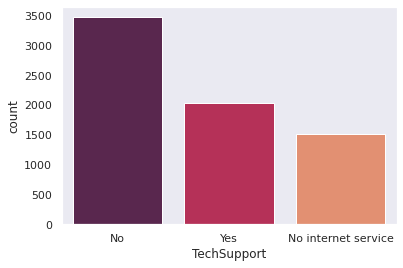

In [ ]:
ax = sns.countplot(x='TechSupport',data = df_TelecomData,palette="rocket")


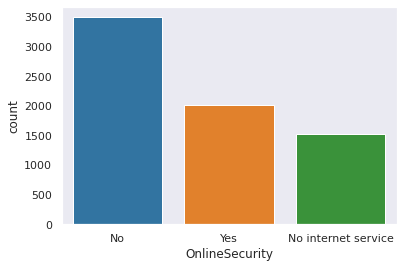

In [ ]:
ax = sns.countplot(x='OnlineSecurity',data = df_TelecomData,palette="tab10")


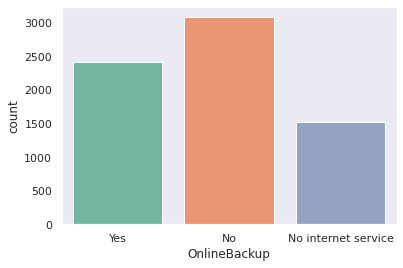

In [ ]:
ax = sns.countplot(x='OnlineBackup',data = df_TelecomData,palette="Set2")


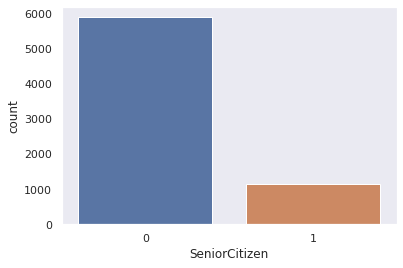

In [ ]:
ax = sns.countplot(x='SeniorCitizen',data=df_TelecomData)

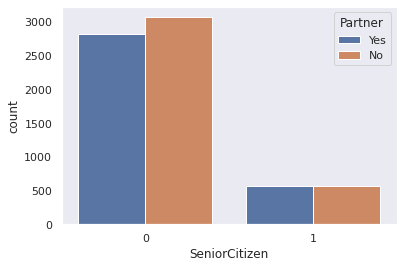

In [ ]:
ax = sns.countplot(x='SeniorCitizen',hue='Partner',data=df_TelecomData)


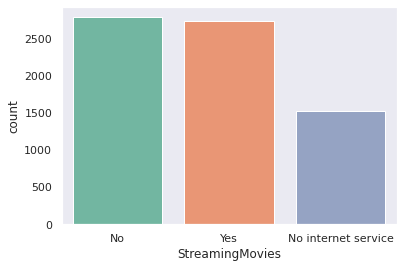

In [ ]:
ax = sns.countplot(x='StreamingMovies',data = df_TelecomData,palette="Set2")


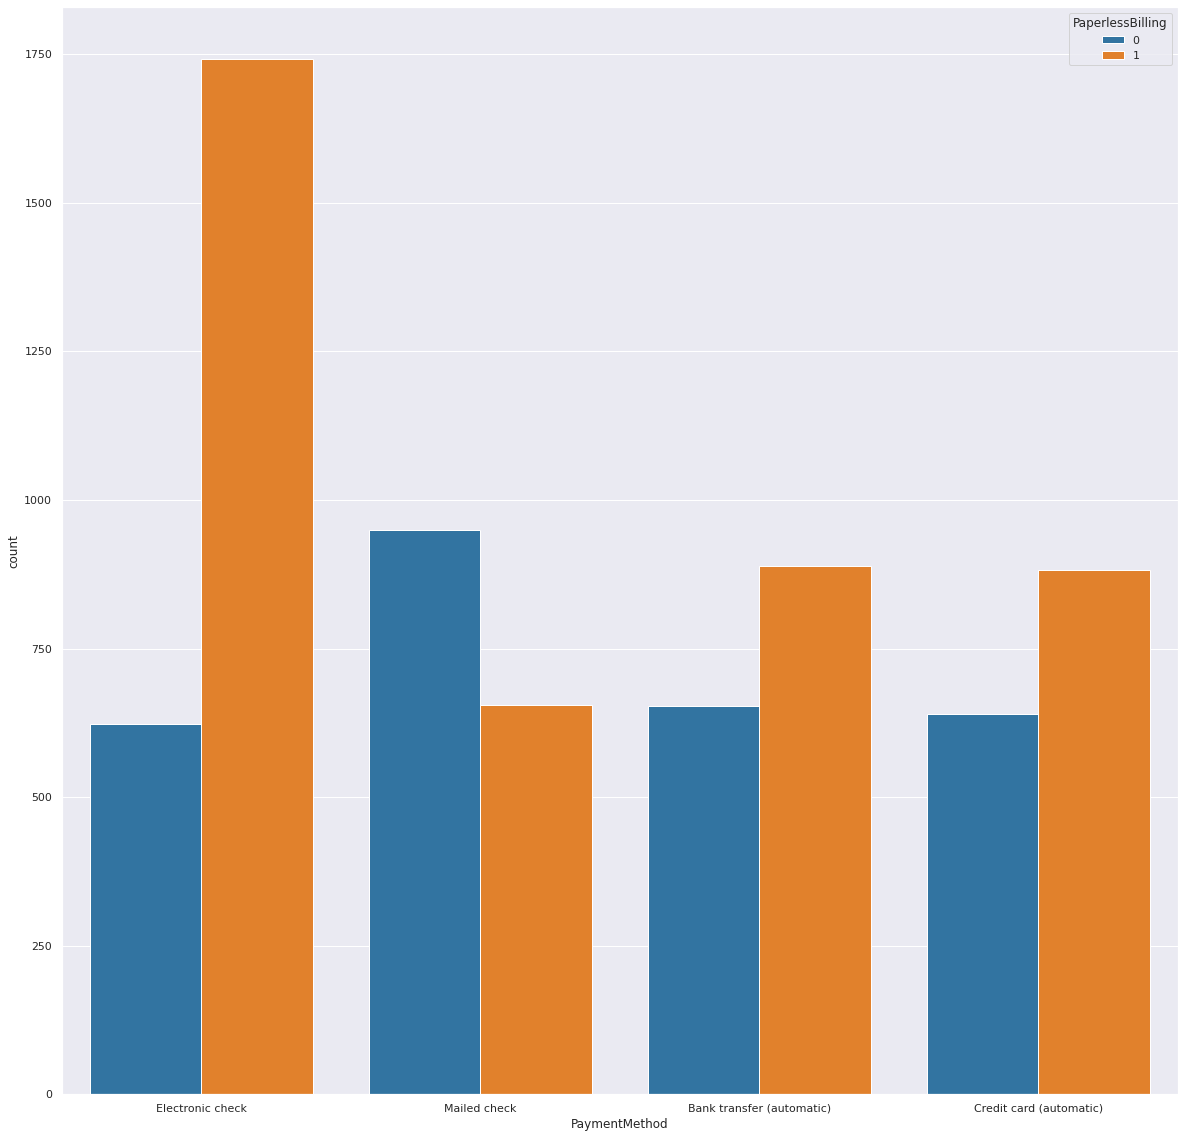

In [48]:
ax = ax = sns.countplot(x='PaymentMethod',hue='PaperlessBilling',data = df_TelecomData,palette="tab10")

#PaperlessBilling_no = df_TelecomData[df_TelecomData.PaperlessBilling=='No'].PaymentMethod      
#PaperlessBilling_yes = df_TelecomData[df_TelecomData.PaperlessBilling=='Yes'].PaymentMethod      

#plt.xlabel("Payment Methods")
#plt.ylabel("Number Of Customers")
#plt.title("Customer Churn Prediction Visualiztion")

#plt.hist([PaperlessBilling_yes, PaperlessBilling_no], rwidth=0.95, color=['green','red'],label=['PaperlessBilling=Yes','PaperlessBilling=No'])
#plt.legend()




<Figure size 720x576 with 0 Axes>

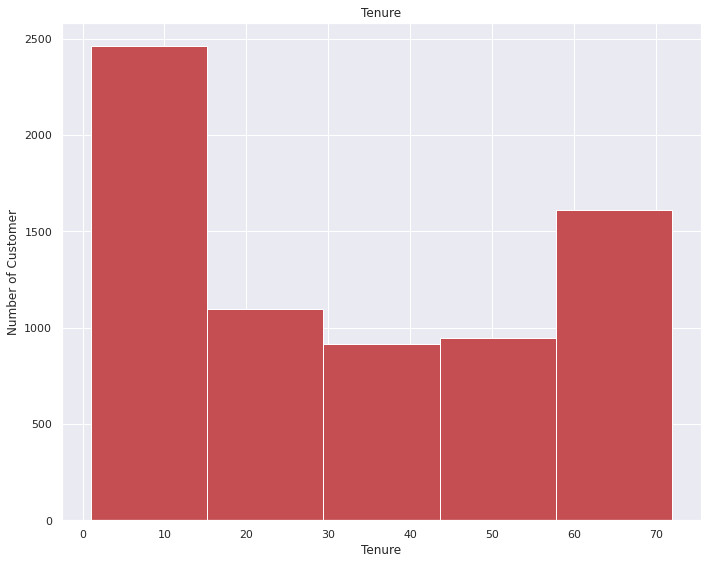

In [19]:
# Tenure - Number of months the customer has stayed with the company
#histograms
plt.figure(figsize=(10,8))
df_TelecomData[['tenure']].hist(figsize = (10, 8), bins = 5, color = 'r')
plt.title("Tenure")
plt.ylabel('Number of Customer')
plt.xlabel('Tenure');
plt.tight_layout()
plt.show()


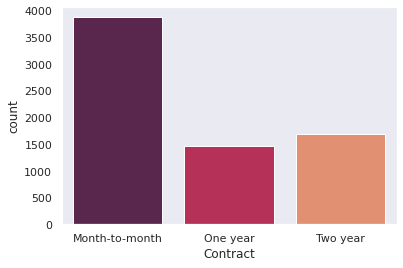

In [ ]:
ax = sns.countplot(x='Contract',data=df_TelecomData,palette="rocket")


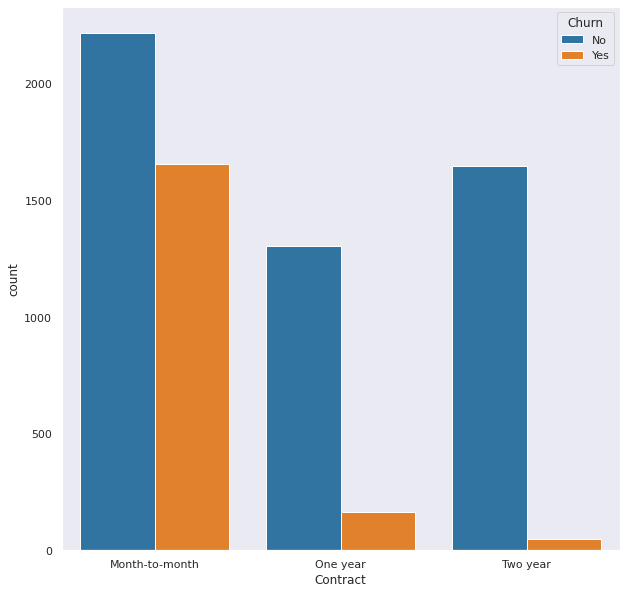

In [ ]:
ax = ax = sns.countplot(x='Contract',hue='Churn',data = df_TelecomData,palette="tab10")


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


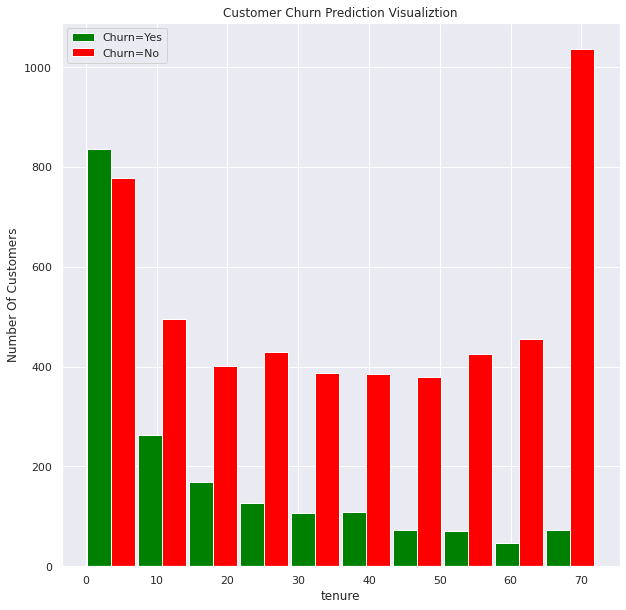

In [ ]:
tenure_churn_no = df_TelecomData[df_TelecomData.Churn=='No'].tenure
tenure_churn_yes = df_TelecomData[df_TelecomData.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


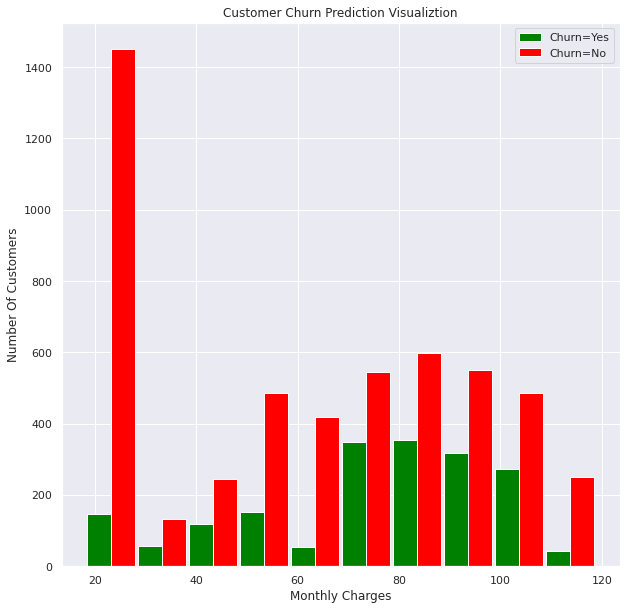

In [ ]:
mc_churn_no = df_TelecomData[df_TelecomData.Churn=='No'].MonthlyCharges      
mc_churn_yes = df_TelecomData[df_TelecomData.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Text(0.5, 0, 'Monthly Charges')

<Figure size 1440x1440 with 0 Axes>

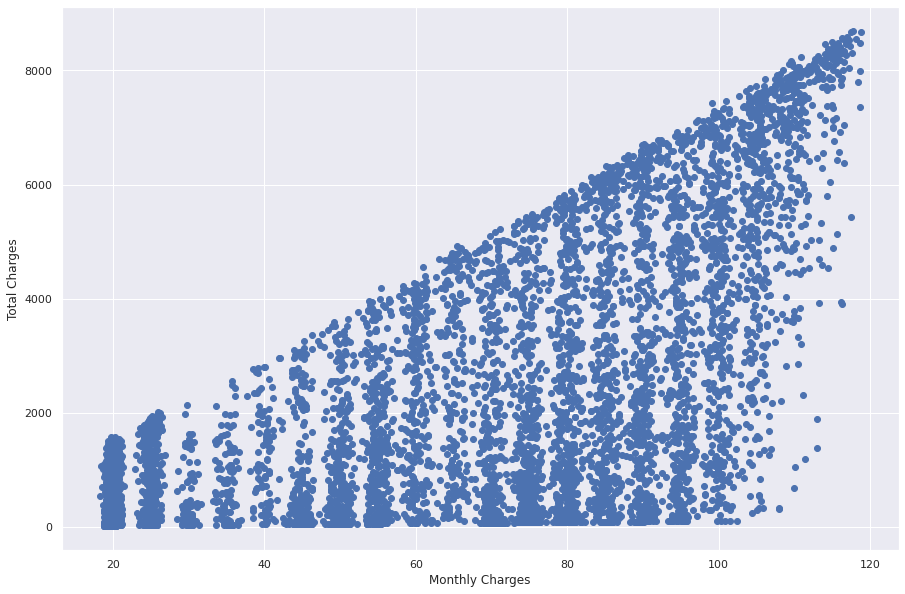

In [39]:
#scatter plots
plt.figure()
plt.figure(figsize = (15, 10))
plt.scatter(df_TelecomData['MonthlyCharges'], df_TelecomData['TotalCharges'])
plt.ylabel('Total Charges')
plt.xlabel('Monthly Charges')

(0.0, 12.0)

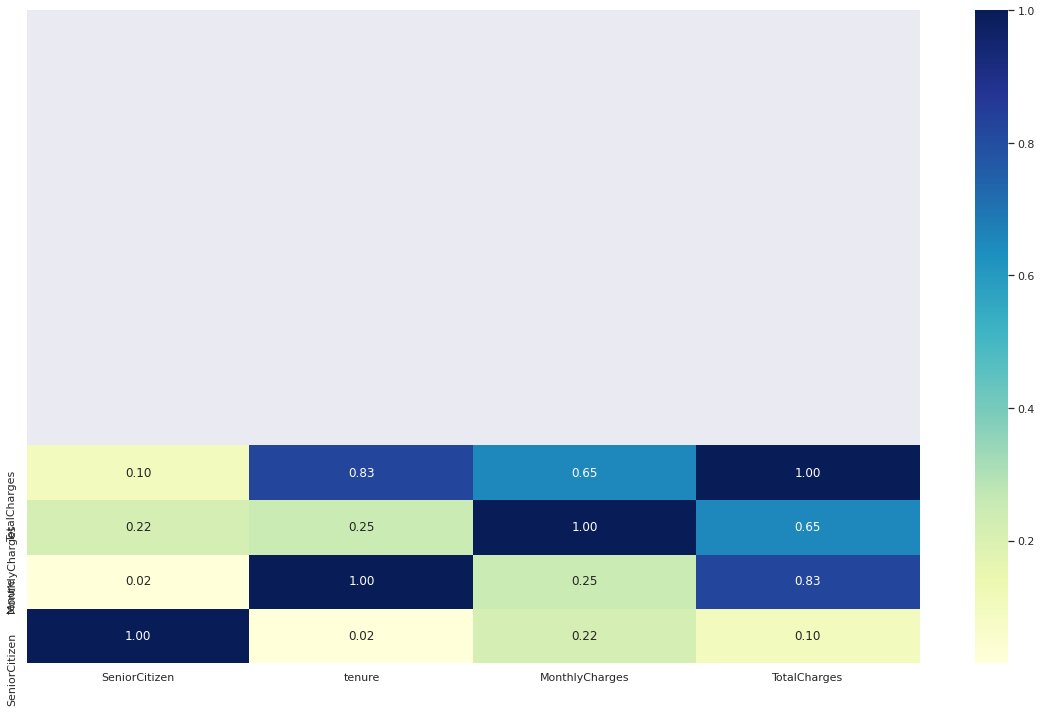

In [ ]:
#heatmap
corr = df_TelecomData.corr()
plt.figure(figsize = (20, 12))
a = sns.heatmap(corr, annot = True, fmt = '.2f', cmap="YlGnBu")
a.set_ylim(0, 12)

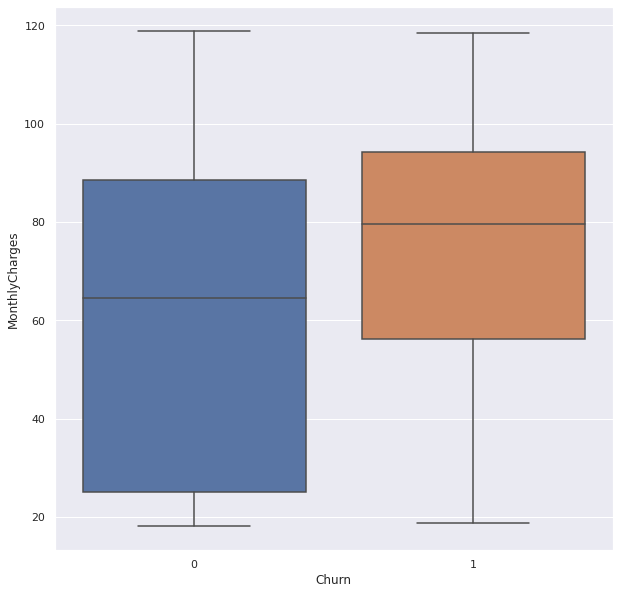

In [36]:
#box plot
plt.figure()
plt.rcParams['figure.figsize'] = (20, 20)
ax = sns.boxplot(x = "Churn", y = "MonthlyCharges", data = df_TelecomData)

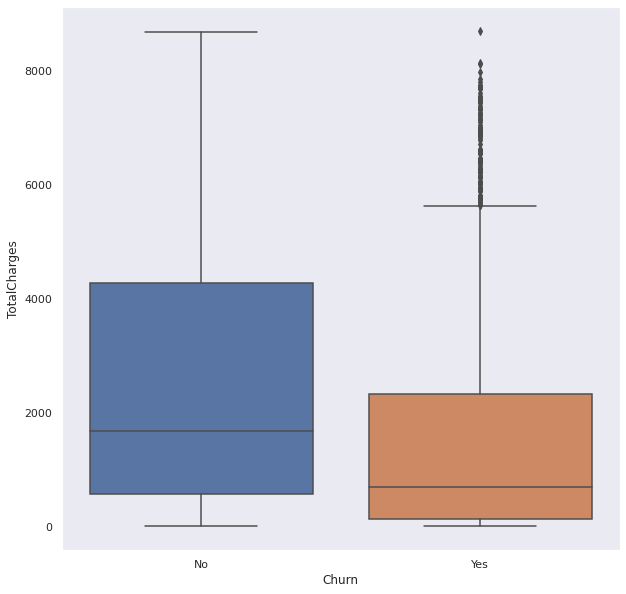

In [ ]:
#box plot
plt.figure()
plt.rcParams['figure.figsize'] = (10, 10)
ax = sns.boxplot(x = "Churn", y = "TotalCharges", data = df_TelecomData)

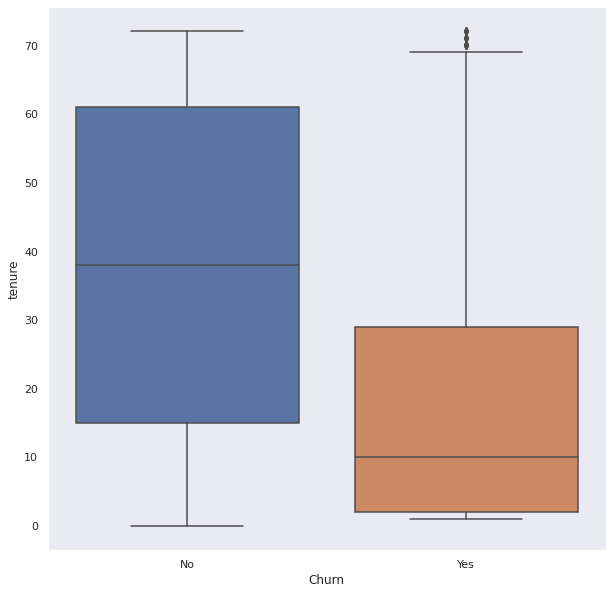

In [ ]:
#box plot
plt.figure()
plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.boxplot(x = "Churn", y = "tenure", data = df_TelecomData)

In [ ]:
df_TelecomData['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
df_TelecomData['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df_TelecomData['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

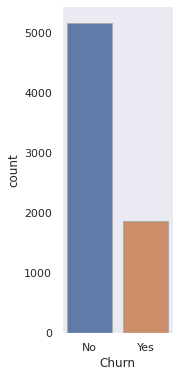

In [ ]:
plt.figure(figsize=(2,6))
sns.countplot(x=df_TelecomData.Churn, edgecolor='darkgray', 
              alpha=.95)
sns.despine()

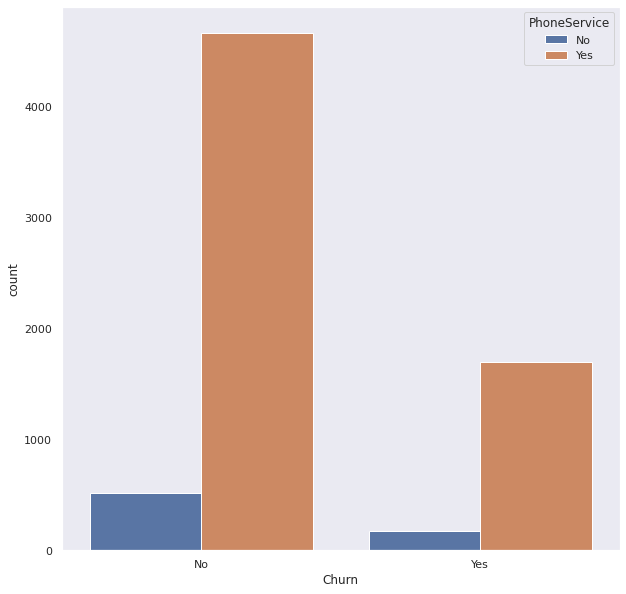

In [ ]:
ax = sns.countplot(x='Churn',hue='PhoneService',data=df_TelecomData)


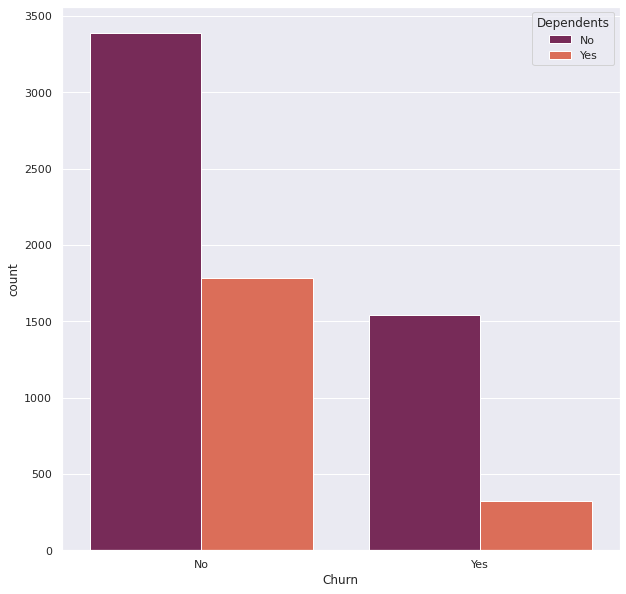

In [ ]:
ax = sns.countplot(x='Churn',hue='Dependents',data=df_TelecomData,palette="rocket")


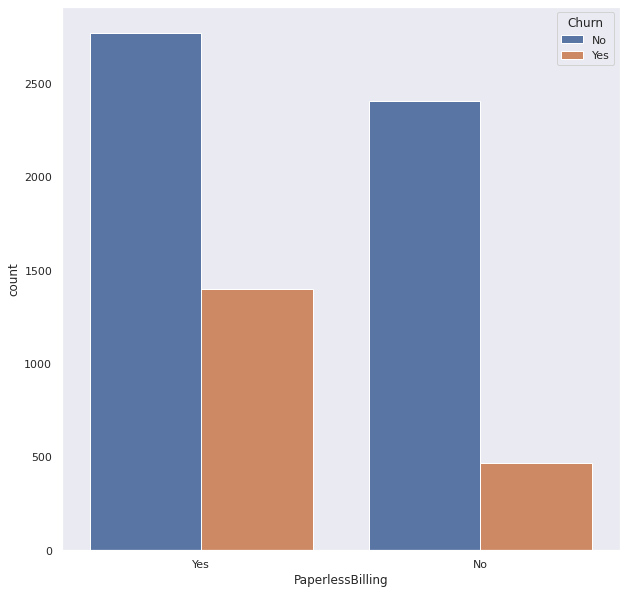

In [ ]:
sns.countplot(x=df_TelecomData['PaperlessBilling'],hue=df_TelecomData['Churn'])
plt.show()

In [ ]:
df_NewData=df_TelecomData.drop(['customerID'],axis=1)

#Gender mapping
Gender_mapping = {
    'Male' :1,
    'Female' : 0,
}
df_NewData.loc[:,'gender'] = df_NewData['gender'].map(Gender_mapping)

#Partner mapping
Partner_mapping = {
    'Yes' : 1,
    'No': 0,
}
df_NewData.loc[:, 'Partner'] = df_NewData['Partner'].map(Partner_mapping)

#Dependents mapping
Dependents_mapping = {
    'Yes' : 1,
    'No': 0,
}
df_NewData.loc[:, 'Dependents'] = df_NewData['Dependents'].map(Dependents_mapping)

#Phone Service mapping
Phone_Service_mapping = {
    'Yes' : 1,
    'No': 0,
}
df_NewData.loc[:, 'PhoneService'] = df_NewData['PhoneService'].map(Phone_Service_mapping)

#Multiple Lines mapping
Multiple_Lines_mapping = {
    'Yes' : 1,
    'No' : 0,
    'No phone service' : -1,
}
df_NewData['MultipleLines']=df_NewData['MultipleLines'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')

#Internet Service mapping
Internet_Service_mapping = {
    'DSL' : 1,
    'Fiber optic' :2,
    'No' : 0,
}
df_NewData['InternetService']=df_NewData['InternetService'].apply(lambda x: '1' if x=='Fiber optic' else '2' if x =='DSL' else'0' )


#Online Security mapping
Online_Security_mapping = {
    'Yes' : 1,
    'No': 0,
    'No phone service' : -1,
}
df_NewData['OnlineSecurity']=df_TelecomData['OnlineSecurity'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')

#Online Backup mapping
Online_Backup_mapping = {
    'Yes' : 1,
    'No': 0,
    'No phone service' : -1,
}
df_NewData['OnlineBackup']=df_NewData['OnlineBackup'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')

#Device Protection mapping
Device_Protection_mapping = {
    'Yes' : 1,
    'No': 0,
    'No phone service' : -1,
}
df_NewData['DeviceProtection']=df_NewData['DeviceProtection'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')

#Tech Support mapping
Tech_Support_mapping = {
    'Yes' : 1,
    'No': 0,
    'No phone service' : -1,
}
df_NewData['TechSupport']=df_NewData['TechSupport'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')

#Streaming TV mapping
Streaming_TV_mapping = {
    'Yes' : 1,
    'NO': 0,
    'No phone service' : -1,
}
df_NewData['StreamingTV']=df_NewData['StreamingTV'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')

#Streaming Movies mapping
Streaming_Movies_mapping = {
    'Yes' : 1,
    'No': 0,
    'No phone service' : -1,
}
df_NewData['StreamingMovies']=df_NewData['StreamingMovies'].apply(lambda x: '1' if x=='Yes' else '2' if x== 'No internet service' else '0')


#Contract mapping
Contract_mapping = {
    'Month-to-month' :0,
    'One year' :1,
    'Two year':2,
}
df_NewData.loc[:, 'Contract'] = df_NewData['Contract'].map(Contract_mapping)


#Paperless Billing mapping
Paperless_Billing_mapping = {
    'Yes' : 1,
    'No': 0,
}
df_NewData.loc[:, 'PaperlessBilling'] = df_NewData['PaperlessBilling'].map(Paperless_Billing_mapping)

#Churn mapping
Churn_mapping = {
    'Yes' : 1,
    'No': 0,
}
df_NewData.loc[:, 'Churn'] = df_NewData['Churn'].map(Churn_mapping)

#Catogarizing customers into new customers and old customers
df_NewData.loc[df_NewData['tenure']<=36,'CustomerGroup'] ='NewCustomer'
df_NewData.loc[df_NewData['tenure']>36,'CustomerGroup'] ='OldCustomer'

#Customer Group mapping
Customer_Group_mapping = {
    'OldCustomer' : 1,
    'NewCustomer': 0,
}
df_NewData.loc[:, 'CustomerGroup'] = df_NewData['CustomerGroup'].map(Customer_Group_mapping)


In [ ]:
df_NewData.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerGroup
0,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1,0
3,1,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,0
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,Electronic check,99.65,820.50,1,0
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,Credit card (automatic),89.10,1949.40,0,0
7,0,0,0,0,10,0,0,2,1,0,0,0,0,0,0,0,Mailed check,29.75,301.90,0,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,Electronic check,104.80,3046.05,1,0
9,1,0,0,1,62,1,0,2,1,1,0,0,0,0,1,0,Bank transfer (automatic),56.15,3487.95,0,1


In [ ]:
df_NewData.shape

(7032, 21)

In [ ]:
df_NewData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
CustomerGroup       0
dtype: int64

In [ ]:
df_NewData.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PhoneService        0.011691
gender             -0.008545
Partner            -0.149982
Dependents         -0.163128
TotalCharges       -0.199484
CustomerGroup      -0.286129
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

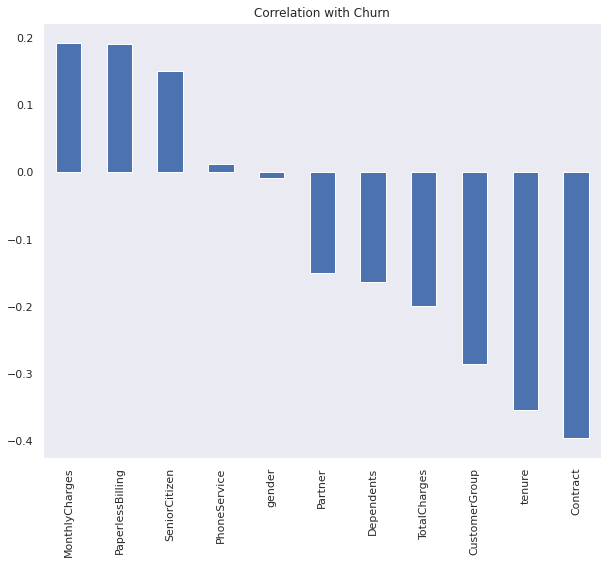

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation with Churn')
df_NewData.corr()['Churn'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

In [ ]:
df_NewData.corr()['MonthlyCharges'].sort_values(ascending=False)

MonthlyCharges      1.000000
TotalCharges        0.651065
PaperlessBilling    0.351930
PhoneService        0.248033
tenure              0.246862
SeniorCitizen       0.219874
CustomerGroup       0.206805
Churn               0.192858
Partner             0.097825
gender             -0.013779
Contract           -0.072739
Dependents         -0.112343
Name: MonthlyCharges, dtype: float64

In [ ]:
df_NewData.corr()['PaperlessBilling'].sort_values(ascending=False)

PaperlessBilling    1.000000
MonthlyCharges      0.351930
Churn               0.191454
TotalCharges        0.157830
SeniorCitizen       0.156258
PhoneService        0.016696
CustomerGroup       0.004828
tenure              0.004823
gender             -0.011902
Partner            -0.013957
Dependents         -0.110131
Contract           -0.175475
Name: PaperlessBilling, dtype: float64

In [ ]:
df_NewData.corr()['CustomerGroup'].sort_values(ascending=False)

CustomerGroup       1.000000
tenure              0.893995
TotalCharges        0.734856
Contract            0.592933
Partner             0.317606
MonthlyCharges      0.206805
Dependents          0.130830
SeniorCitizen       0.006732
PaperlessBilling    0.004828
PhoneService       -0.001752
gender             -0.002636
Churn              -0.286129
Name: CustomerGroup, dtype: float64

In [ ]:
#calculate spearman correlations between numerical variables and churn information
#spearman does not make normality assumption 
corrs = df_NewData.corr(method='spearman')['Churn']

abs(corrs).sort_values(ascending = False)


Churn               1.000000
Contract            0.405742
tenure              0.369659
CustomerGroup       0.286129
TotalCharges        0.232190
PaperlessBilling    0.191454
MonthlyCharges      0.184167
Dependents          0.163128
SeniorCitizen       0.150541
Partner             0.149982
PhoneService        0.011691
gender              0.008545
Name: Churn, dtype: float64

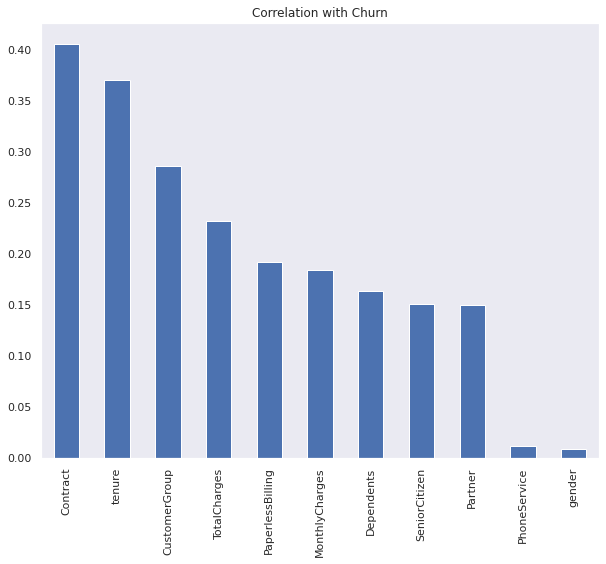

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation with Churn')
corrs = df_NewData.corr(method='spearman')['Churn']
abs(corrs).sort_values(ascending = False).sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

In [ ]:
x_ThreeVariables = df_NewData[['Contract', 'tenure','CustomerGroup']] 

In [ ]:
x_ThreeVariables

,Contract,tenure,CustomerGroup
0,0,1,0
1,1,34,0
2,0,2,0
3,1,45,1
4,0,2,0
...,...,...,...
7038,1,24,0
7039,1,72,1
7040,0,11,0
7041,0,4,0


In [ ]:
y_Churn = df_NewData[['Churn']]

In [ ]:
y_Churn


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Logistic Regression model

In [ ]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ThreeVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit logistic regression model to training set
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state =0)
lrc.fit(x_train, y_train)

#predict the results on test set
y_pred = lrc.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1402  153]
 [ 354  201]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
report =classification_report(y_test,y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1555
           1       0.57      0.36      0.44       555

    accuracy                           0.76      2110
   macro avg       0.68      0.63      0.64      2110
weighted avg       0.74      0.76      0.74      2110



Text(0.5, 66.5, 'Predicted label')

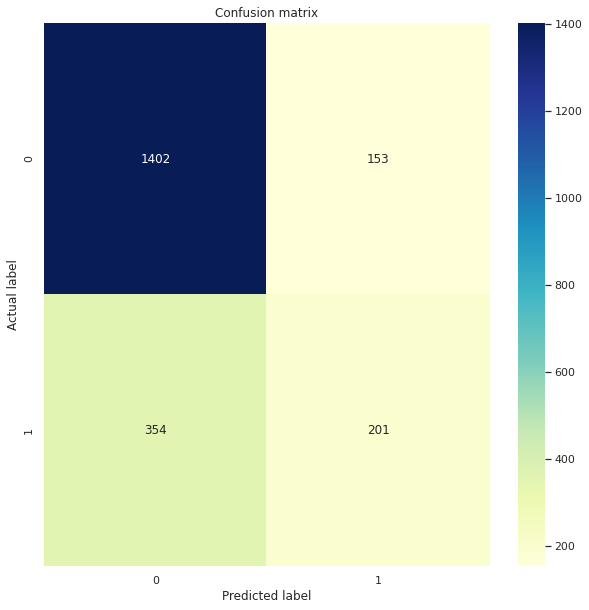

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

#ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
x_eightVariables = df_NewData[['Contract', 'tenure','CustomerGroup','PaperlessBilling','MonthlyCharges','Dependents','SeniorCitizen','Partner']]

In [ ]:
x_eightVariables

,Contract,tenure,CustomerGroup,PaperlessBilling,MonthlyCharges,Dependents,SeniorCitizen,Partner
0,0,1,0,1,29.85,0,0,1
1,1,34,0,0,56.95,0,0,0
2,0,2,0,1,53.85,0,0,0
3,1,45,1,0,42.30,0,0,0
4,0,2,0,1,70.70,0,0,0
...,...,...,...,...,...,...,...,...
7038,1,24,0,1,84.80,1,0,1
7039,1,72,1,1,103.20,1,0,1
7040,0,11,0,1,29.60,1,0,1
7041,0,4,0,1,74.40,0,1,1


Logistic Regression model

In [ ]:

#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_eightVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit logistic regression model to training set
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 0)
lrc.fit(x_train, y_train)

#predict the results on test set
y_pred = lrc.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1378,  177],
       [ 281,  274]])

In [ ]:
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1555
           1       0.61      0.49      0.54       555

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



Text(0.5, 66.5, 'Predicted label')

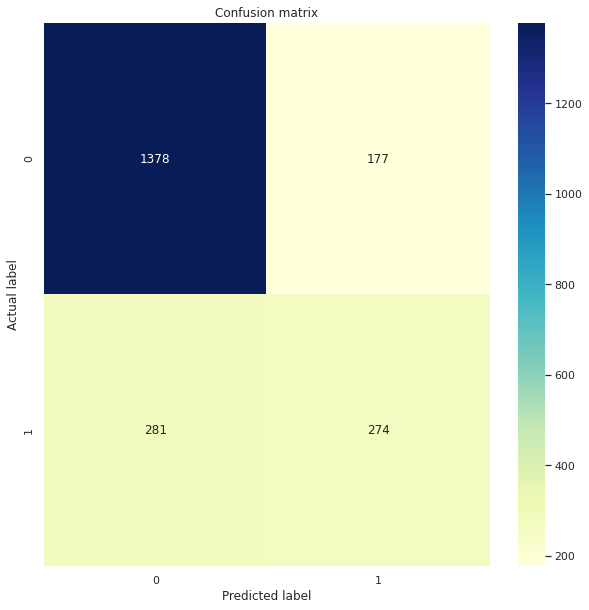

In [ ]:
#ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
x_ThreeVariables = df_NewData[['Contract', 'tenure','CustomerGroup']] 
y_Churn = df_NewData[['Churn']]



Decision Tree model

In [ ]:
#Decision Tree
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ThreeVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit decision tree model to training set
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 50, max_depth =3)
dtc.fit(x_train, y_train)

#predict the results on test set
y_pred = dtc.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1483   72]
 [ 442  113]]


In [ ]:
from sklearn.metrics import classification_report
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1555
           1       0.61      0.20      0.31       555

    accuracy                           0.76      2110
   macro avg       0.69      0.58      0.58      2110
weighted avg       0.73      0.76      0.71      2110



Text(0.5, 66.5, 'Predicted label')

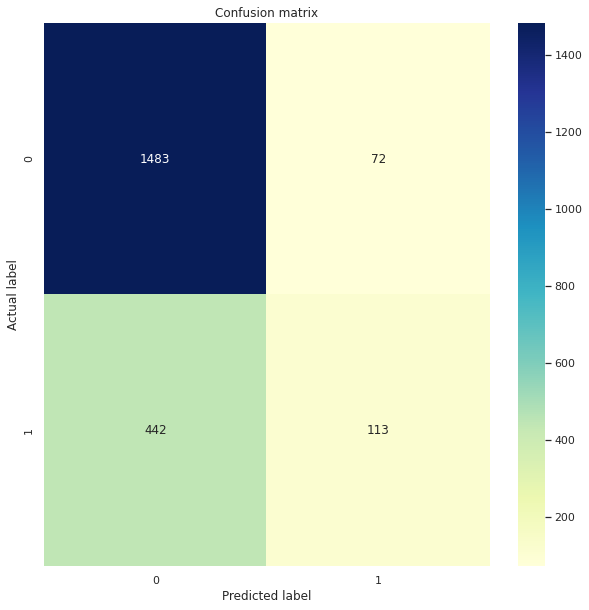

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
x_eightVariables = df_NewData[['Contract', 'tenure','CustomerGroup','PaperlessBilling','MonthlyCharges','Dependents','SeniorCitizen','Partner']]
y_Churn = df_NewData[['Churn']]

Decision Tree Model

In [ ]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_eightVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit decision tree model to training set
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth =3)
dtc.fit(x_train, y_train)

#predict the results on test set
y_pred = dtc.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1463   92]
 [ 358  197]]


In [ ]:
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1555
           1       0.68      0.35      0.47       555

    accuracy                           0.79      2110
   macro avg       0.74      0.65      0.67      2110
weighted avg       0.77      0.79      0.76      2110



Text(0.5, 66.5, 'Predicted label')

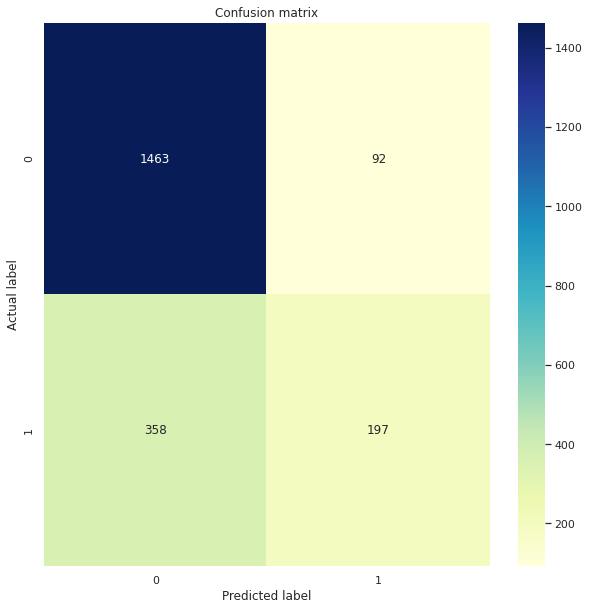

In [ ]:
#ax = sns.heatmap(confusion_matrix(y_test,y_pred_B),annot=True)

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
x_ThreeVariables = df_NewData[['Contract', 'tenure','CustomerGroup']] 
y_Churn = df_NewData[['Churn']]

Random forest model

In [ ]:
# Random Forest Classifier
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ThreeVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit random forest model to training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'entropy', random_state = 20) 
rfc.fit(x_train, y_train)

#predict the results on test set
y_pred = rfc.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


[[1450  105]
 [ 404  151]]


In [ ]:
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1555
           1       0.59      0.27      0.37       555

    accuracy                           0.76      2110
   macro avg       0.69      0.60      0.61      2110
weighted avg       0.73      0.76      0.72      2110



Text(0.5, 66.5, 'Predicted label')

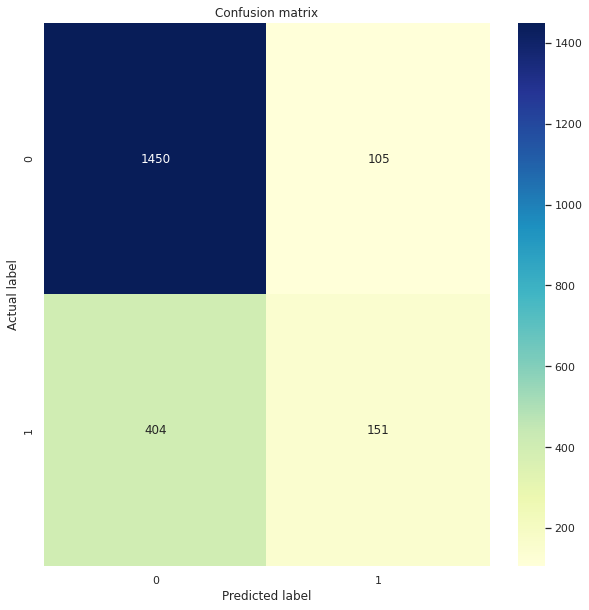

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
x_eightVariables = df_NewData[['Contract', 'tenure','CustomerGroup','PaperlessBilling','MonthlyCharges','Dependents','SeniorCitizen','Partner']]
y_Churn = df_NewData[['Churn']]

Random Forest model

In [ ]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_eightVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit random forest model to training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10, criterion = 'entropy', random_state = 100) 
rfc.fit(x_train, y_train)

#predict the results on test set
y_pred = rfc.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1393  162]
 [ 298  257]]


In [ ]:
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1555
           1       0.61      0.46      0.53       555

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



Text(0.5, 66.5, 'Predicted label')

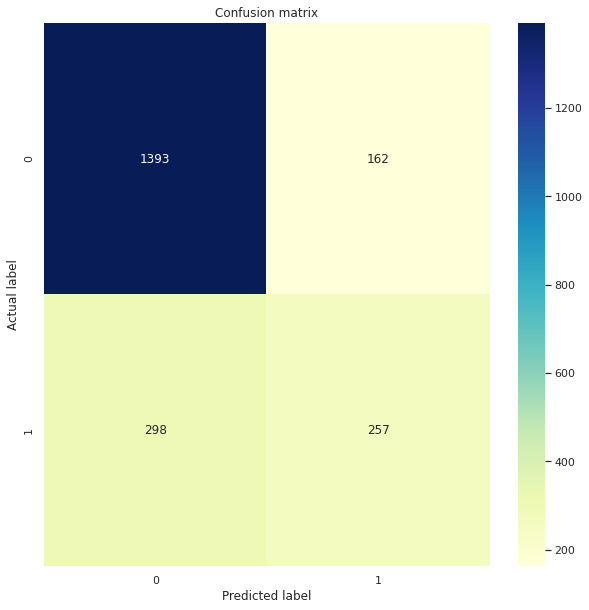

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
x_ThreeVariables = df_NewData[['Contract', 'tenure','CustomerGroup']] 
y_Churn = df_NewData[['Churn']]

Naive bayes model

In [ ]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ThreeVariables, y_Churn, test_size = 0.3, random_state = 0)


#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit naive bayes model to training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() 
nb.fit(x_train, y_train)

#predict the results on test set
y_pred = nb.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1022  533]
 [ 132  423]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.66      0.75      1555
           1       0.44      0.76      0.56       555

    accuracy                           0.68      2110
   macro avg       0.66      0.71      0.66      2110
weighted avg       0.77      0.68      0.70      2110



Text(0.5, 66.5, 'Predicted label')

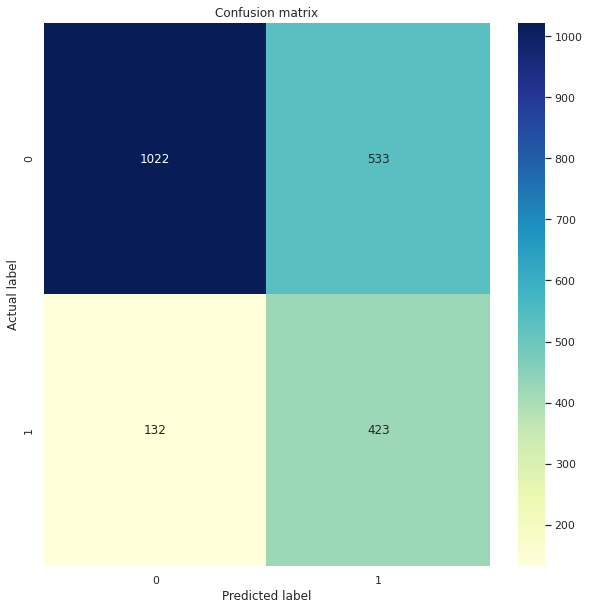

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
x_eightVariables = df_NewData[['Contract', 'tenure','CustomerGroup','PaperlessBilling','MonthlyCharges','Dependents','SeniorCitizen','Partner']]
y_Churn = df_NewData[['Churn']]

Naive bayes model

In [ ]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_eightVariables, y_Churn, test_size = 0.3, random_state = 0)

#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

#fit naive bayes model to training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() 
nb.fit(x_train, y_train)

#predict the results on test set
y_pred = nb.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1125  430]
 [ 144  411]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
report =classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1555
           1       0.49      0.74      0.59       555

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.73      0.74      2110



Text(0.5, 66.5, 'Predicted label')

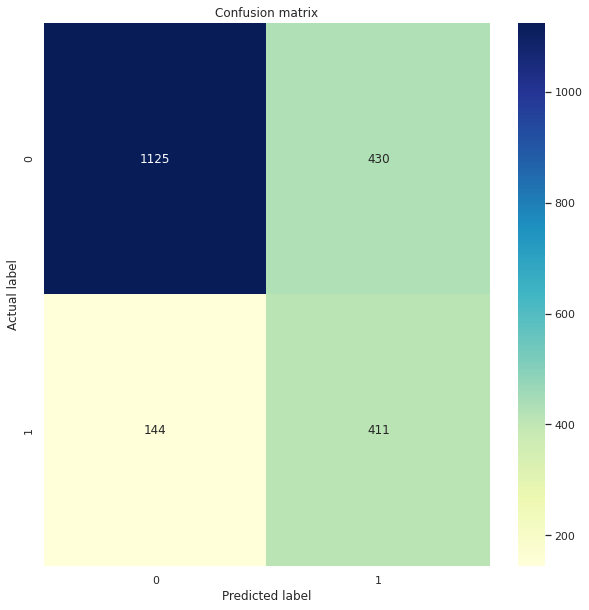

In [ ]:
#ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
df_TelecomData.drop('customerID',axis='columns',inplace=True)
df_TelecomData.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df_TelecomData)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df_TelecomData.replace('No internet service','No',inplace=True)
df_TelecomData.replace('No phone service','No',inplace=True)

In [23]:
yes_no_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df_TelecomData[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
df_TelecomData['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
for col in df_TelecomData:
    print(f'{col}: {df_TelecomData[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df_OneHot_data = pd.get_dummies(data=df_TelecomData, columns=['InternetService','Contract','PaymentMethod'])
df_OneHot_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df_OneHot_data.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4313,Female,0,0,0,23,1,0,0,1,0,1,0,0,1,79.10,1783.75,0,0,1,0,1,0,0,0,0,0,1
1116,Female,0,0,0,38,1,1,0,0,0,0,0,0,1,24.25,914.40,0,0,0,1,0,1,0,0,0,1,0
2095,Male,0,0,0,1,1,0,0,0,0,0,1,0,1,79.95,79.95,1,0,1,0,1,0,0,0,0,1,0
1885,Male,0,1,1,24,1,0,1,1,0,1,0,1,1,70.30,1706.45,0,1,0,0,1,0,0,0,1,0,0
2256,Female,0,0,1,15,1,0,1,1,1,1,0,0,0,65.60,1010.00,0,1,0,0,0,1,0,0,1,0,0
5198,Female,1,1,0,47,1,1,1,0,0,0,0,0,0,80.35,3825.85,1,0,1,0,1,0,0,0,0,1,0
2061,Male,0,1,1,7,1,0,0,0,1,0,0,0,0,48.70,340.25,1,1,0,0,1,0,0,0,0,1,0
6351,Male,0,1,1,50,1,1,0,1,0,1,1,1,0,103.70,5071.05,1,0,1,0,1,0,0,0,0,1,0
6425,Male,0,1,1,52,0,0,1,0,1,0,0,1,0,44.25,2276.10,0,1,0,0,0,1,0,1,0,0,0
4662,Male,0,0,1,22,1,0,0,0,0,0,0,0,0,20.15,432.50,0,0,0,1,1,0,0,0,1,0,0


In [34]:
df_OneHot_data.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_OneHot_data[cols_to_scale] = scaler.fit_transform(df_OneHot_data[cols_to_scale])

In [28]:
for col in df_OneHot_data:
    print(f'{col}: {df_OneHot_data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
Te

In [29]:
df_OneHot_data.shape

(7032, 27)

In [ ]:
X = df_OneHot_data.drop('Churn',axis='columns')
y = df_OneHot_data['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Artificial neural networks - ANN

In [ ]:
# sequential model to initialise our ANN and Dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

#Dropout Regularization is used to reduce overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)




In [ ]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

563/563 [==============================] - 1s 936us/step - loss: 0.3666 - accuracy: 0.8327
Train score: 0.3665676712989807
Train accuracy: 0.8327111005783081
********************
141/141 [==============================] - 0s 975us/step - loss: 0.4687 - accuracy: 0.7726
Test score: 0.4687286913394928
Test accuracy: 0.7725657224655151


In [ ]:
classifier.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.7768


[0.45915907621383667, 0.7768301367759705]

Text(0.5, 66.5, 'Predicted label')

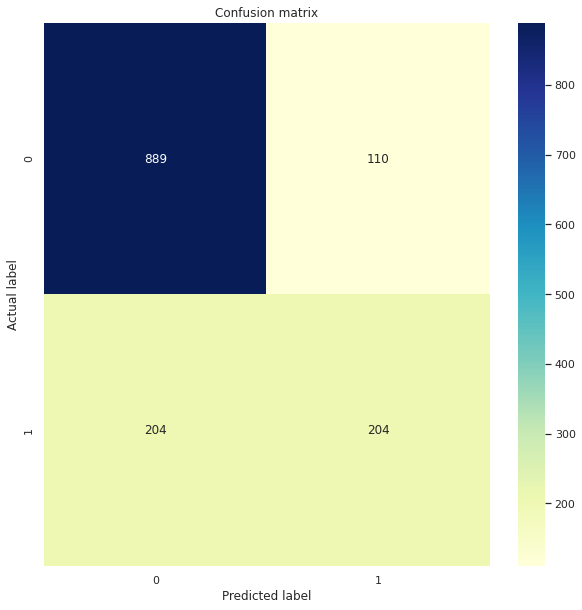

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.65      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


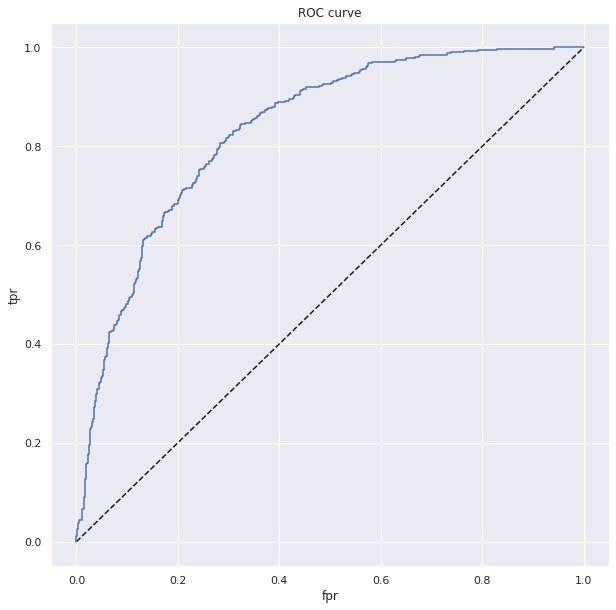

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8346189326581483